<a href="https://colab.research.google.com/github/engrtobechi/Data-Analysis-of-Nigerian-Elections/blob/main/Analyzing_the_2023_Nigerian_Presential_Election_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Nigerian Presidential Election Results using Python

The 2023 Nigerian presidential election was held on February 25, 2023. In this Notebook, we will use Python to analyze a transcribed set of polling unit results scrapped from the [INEC IReV Portal](https://www.inecelectionresults.ng/) for Rivers State.


The data is in tabulated form and includes information about the state, local government area (LGA), ward, polling unit code (PU-Code), polling unit name (PU-Name), number of accredited voters, number of registered voters, and number of votes for each political party.

Our aim is to analyze the data, produce charts and discuss our findings.

####Credit:
- ObiDients on Twitter
- [Mark Essien's](https://twitter.com/markessien) for the [web application](https://forensic.nigeria2.com/) used in transcribing scrapped data from [INEC IReV Portal](https://www.inecelectionresults.ng/).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("RIVERS_crosschecked.csv")

print(df.describe())

       Accredited_Voters  Registered_Voters  Transcription_Count          APC  \
count        4769.000000        4769.000000               4769.0  4769.000000   
mean           81.538897         511.215139                 -1.0    20.145943   
std            69.574095         497.710243                  0.0    33.541690   
min             0.000000           1.000000                 -1.0     0.000000   
25%            30.000000         133.000000                 -1.0     3.000000   
50%            66.000000         415.000000                 -1.0    10.000000   
75%           117.000000         750.000000                 -1.0    25.000000   
max           615.000000        7568.000000                 -1.0   562.000000   

                LP          PDP         NNPP  
count  4769.000000  4769.000000  4769.000000  
mean     42.022856    14.139233     0.295240  
std      59.052428    20.336017     1.847948  
min       0.000000     0.000000     0.000000  
25%       6.000000     2.000000    

To create a chart showing the number of voters per polling unit, we can use the following code:

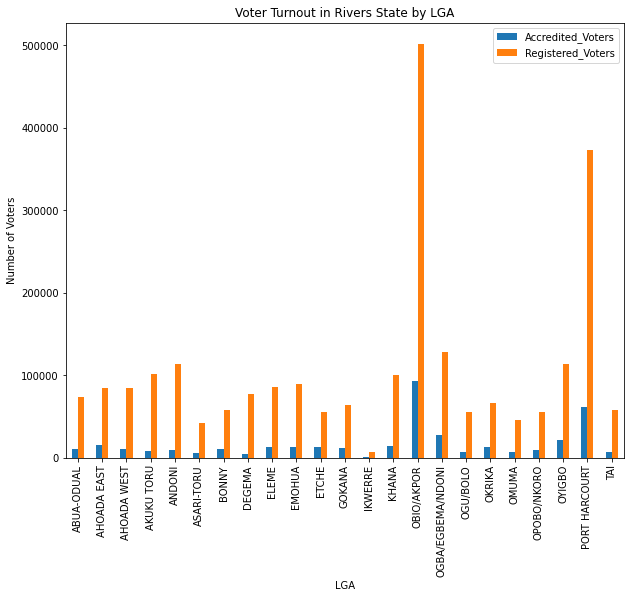

In [80]:
# group by LGA and calculate the total number of accredited and registered voters
voters_by_lga = df.groupby('LGA')[['Accredited_Voters', 'Registered_Voters']].sum()

# plot the bar chart
voters_by_lga.plot(kind='bar', rot=90, figsize=(10,8))
plt.title("Voter Turnout in Rivers State by LGA")
plt.xlabel("LGA")
plt.ylabel("Number of Voters")
plt.show()


We can see that some local government areas had significantly higher voter turnout than others.

This code will give us a horizontal bar chart with the top 10 LGAs with the highest voter turnout on the y-axis and the number of accredited voters on the x-axis. The plt.gca().invert_yaxis() line is added to invert the y-axis so that the LGAs are listed from top to bottom in descending order.

Note: You may need to adjust the figsize parameter to make the chart larger or smaller, depending on your preferences.

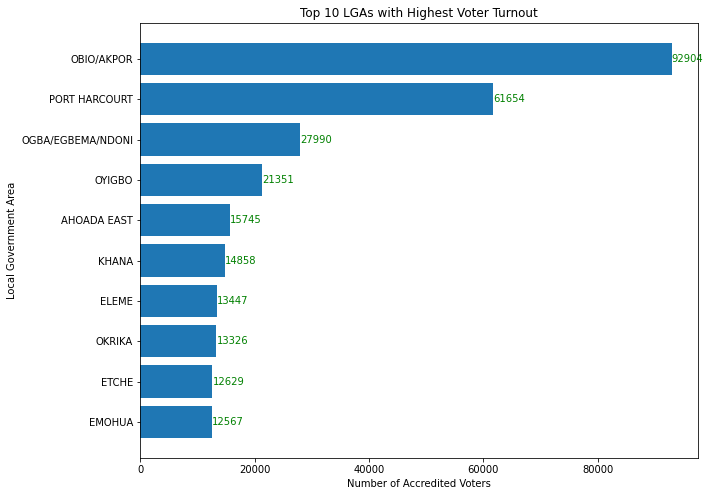

In [7]:
# sort the LGAs by voter turnout and select the top 10
top_lgas = df.groupby('LGA')['Accredited_Voters'].sum().sort_values(ascending=False)[:10]

# create a horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(top_lgas.index, top_lgas.values)

for i, v in enumerate(top_lgas.values):
  plt.text(v, i, str(v), color='green', va='center')

plt.xlabel('Number of Accredited Voters')
plt.ylabel('Local Government Area')
plt.title('Top 10 LGAs with Highest Voter Turnout')
plt.gca().invert_yaxis()
plt.show()


To create a pie chart showing the distribution of votes between the APC, LP, PDP, and NNPP parties, we can use the following code:

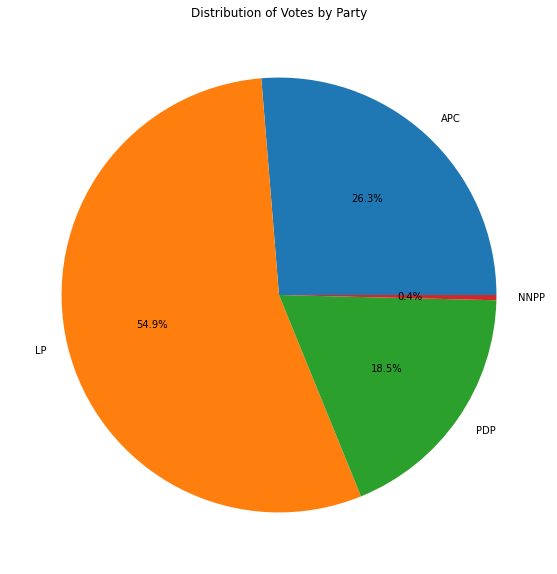

In [8]:
# Calculate total votes for each party
apc_votes = df['APC'].sum()
lp_votes = df['LP'].sum()
pdp_votes = df['PDP'].sum()
nnpp_votes = df['NNPP'].sum()

# Create a list of party names and their votes
parties = ['APC', 'LP', 'PDP', 'NNPP']
votes = [apc_votes, lp_votes, pdp_votes, nnpp_votes]

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(votes, labels=parties, autopct='%1.1f%%')
plt.title('Distribution of Votes by Party')
plt.show()


In [9]:
# create a boolean mask to filter out results that were stamped
stamped_mask = (df['Result_Sheet_Stamped'] == True)

# create a boolean mask to filter out results that were not stamped
not_stamped_mask = (df['Result_Sheet_Stamped'] == False)

# create a new DataFrame with only the results not stamped
not_stamped = df.loc[not_stamped_mask]

# create a new DataFrame with only the stamped results
stamped = df.loc[stamped_mask]

# print the number of not stamped results
print(f"Number of Results Not Stamped: {len(not_stamped)}")


Number of Results Not Stamped: 4570


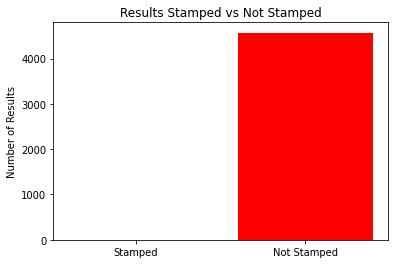

In [10]:
# count the number of results stamped
stamped = df['Result_Sheet_Stamped'].value_counts(normalize=True) * 100

# create a bar chart
plt.bar(['Stamped', 'Not Stamped'], [stamped[True], len(not_stamped)], color=['blue', 'red'])
plt.ylabel('Number of Results')
plt.title('Results Stamped vs Not Stamped')
plt.show()


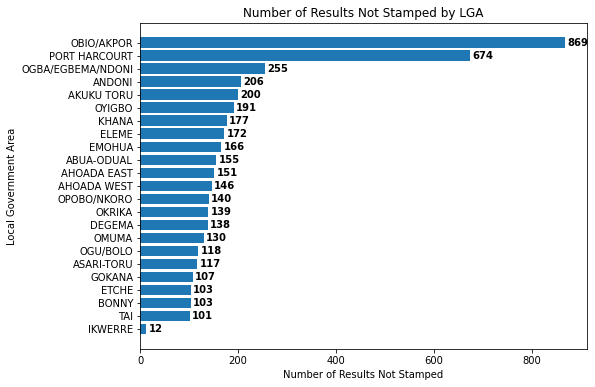

In [11]:
# calculate the number of results not stamped for each LGA
not_stamped = df.groupby('LGA')['Result_Sheet_Stamped'].apply(lambda x: sum(~x)).sort_values(ascending=False)

# create a horizontal bar chart with labels
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(not_stamped.index, not_stamped.values)
ax.set_xlabel('Number of Results Not Stamped')
ax.set_ylabel('Local Government Area')
ax.set_title('Number of Results Not Stamped by LGA')

# add labels for each bar
for i, v in enumerate(not_stamped.values):
    ax.text(v + 5, i, str(v), color='black', fontweight='bold', va='center')

# invert the y-axis so that the LGAs are listed from top to bottom
ax.invert_yaxis()

plt.show()


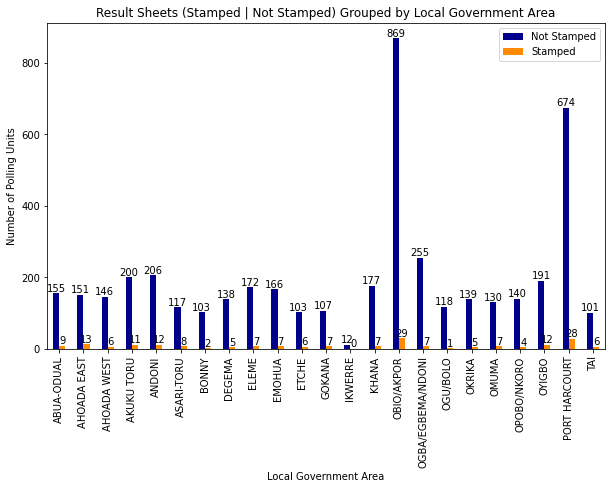

In [12]:
# Group the data by LGA and calculate the number of result sheets stamped and not stamped
grouped = df.groupby(['LGA'])['Result_Sheet_Stamped'].value_counts()
grouped = grouped.unstack().fillna(0)

# Create a bar chart of the data
ax = grouped.plot(kind='bar', figsize=(10,6), color=['darkblue', 'darkorange'])

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Add a legend and axis labels
ax.legend(['Not Stamped', 'Stamped'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Local Government Area')
ax.set_ylabel('Number of Polling Units')
ax.set_title('Result Sheets (Stamped | Not Stamped) Grouped by Local Government Area')

plt.show()


Let's check the data for the total number of mutilated polling unit result sheets by LGA

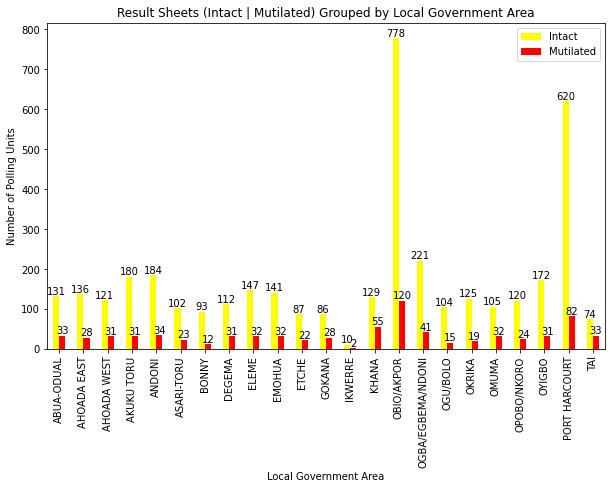

In [13]:
# Group the data by LGA and calculate the number of result sheets stamped and not stamped
grouped = df.groupby(['LGA'])['Result_Sheet_Corrected'].value_counts()
grouped = grouped.unstack().fillna(0)

# Create a bar chart of the data
ax = grouped.plot(kind='bar', figsize=(10,6), color=['yellow', 'red'])

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Add a legend and axis labels
ax.legend(['Intact', 'Mutilated'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Local Government Area')
ax.set_ylabel('Number of Polling Units')
ax.set_title('Result Sheets (Intact | Mutilated) Grouped by Local Government Area')

plt.show()


Let us have a look at Party Peformance by Local Government Area.

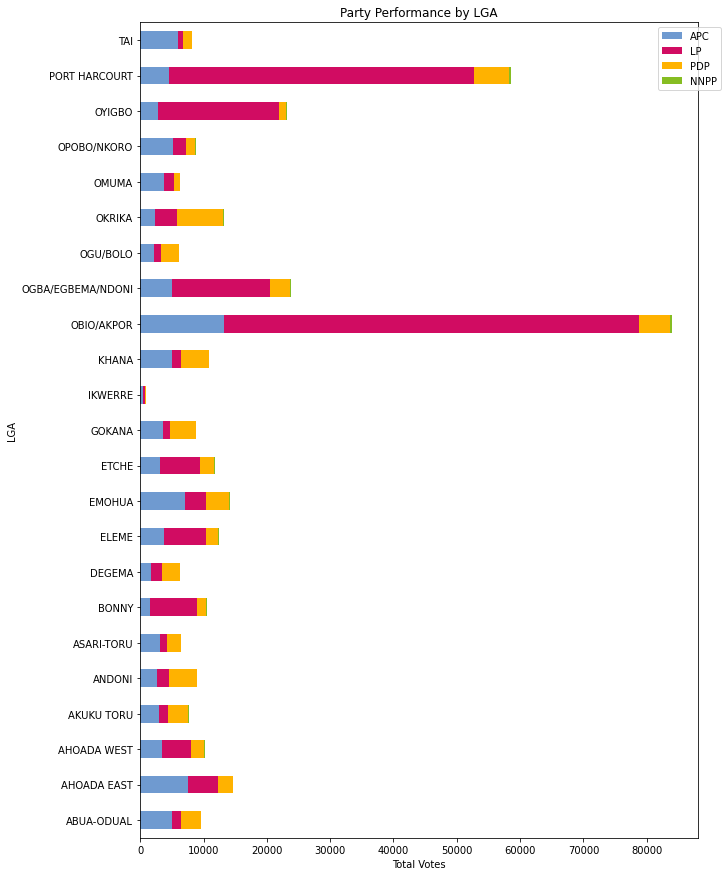

In [35]:
# Group data by LGA and sum votes for each party
grouped_data = df.groupby('LGA').sum()[['APC', 'LP', 'PDP', 'NNPP']]

# Calculate total valid votes for each LGA
#grouped_data['Valid_Votes'] = grouped_data.sum(axis=1)

# Sort data by Valid Votes in descending order
#grouped_data = grouped_data.sort_values(by='Valid_Votes', ascending=False)

# Create a horizontal bar chart to visualize party performance by LGA
grouped_data.plot(kind='barh', stacked=True, color = ['#6f9ad0', '#d10c62', '#ffb200', '#86bd22'], figsize=(10, 15))
plt.title('Party Performance by LGA')
plt.xlabel('Total Votes')
plt.ylabel('LGA')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


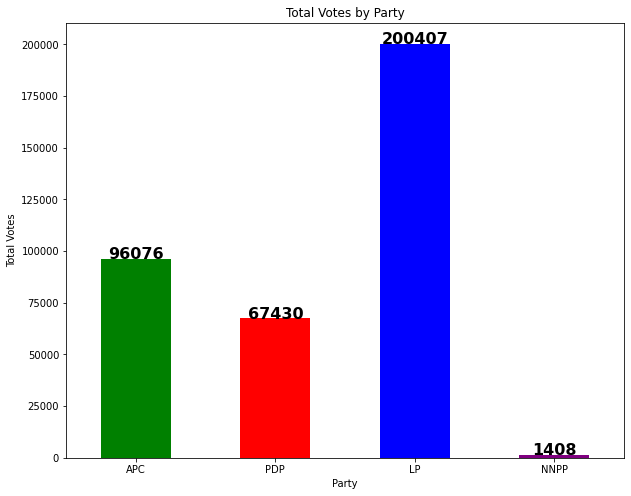

In [84]:
party_results = df[['APC', 'PDP', 'LP', 'NNPP']].sum()
party_results.plot(kind='bar', color=['green', 'red', 'blue', 'purple'], figsize=(10,8))
plt.title('Total Votes by Party')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=0)
for i, v in enumerate(party_results):
    plt.text(i, v + 50, str(v), ha='center', fontweight='semibold', fontsize=16)
plt.show()


In the next part we analyse the unsure data set.

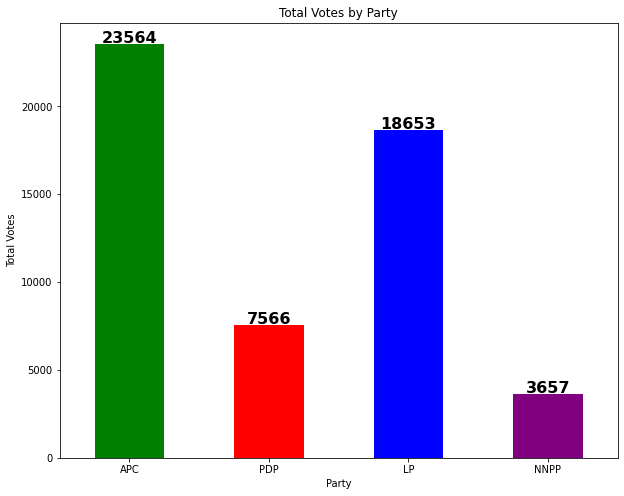

In [85]:
unsure_df = pd.read_csv('RIVERS_unsure.csv')

party_results = unsure_df[['APC', 'PDP', 'LP', 'NNPP']].sum()
party_results.plot(kind='bar', color=['green', 'red', 'blue', 'purple'], figsize=(10,8))
plt.title('Total Votes by Party')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=0)
for i, v in enumerate(party_results):
    plt.text(i, v + 50, str(v), ha='center', fontweight='semibold', fontsize=16)
plt.show()
